## Read image

In [18]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
import cv2 as cv
# filepath = '/mnt/d/ProjectData/GoogleEarthEnginee/test_export_landsat_3_bands.tif'
filepath_b3 = 'LC08_L1TP_141041_20130915_20170502_01_T1/LC08_L1TP_141041_20130915_20170502_01_T1_B3.TIF'
filepath_b4 = 'LC08_L1TP_141041_20130915_20170502_01_T1/LC08_L1TP_141041_20130915_20170502_01_T1_B4.TIF'
filepath_b5 = 'LC08_L1TP_141041_20130915_20170502_01_T1/LC08_L1TP_141041_20130915_20170502_01_T1_B5.TIF'

# src_b3 = rasterio.open(filepath_b3)
# array_b3 = src_b3.read()
# image_b3 = reshape_as_image(array_b3)
# # print(array_b3.shape)
# # plt.imshow(image_b3 , 'gray')
# image_b4 = reshape_as_image(rasterio.open(filepath_b4).read())
# image_b5 = reshape_as_image(rasterio.open(filepath_b5).read())
image_b3 = rasterio.open(filepath_b3).read(1)
image_b4 = rasterio.open(filepath_b4).read(1)
image_b5 = rasterio.open(filepath_b5).read(1)

In [19]:
print(image_b3.shape,image_b4.shape,image_b5.shape)

(7851, 7711) (7851, 7711) (7851, 7711)


65535 0


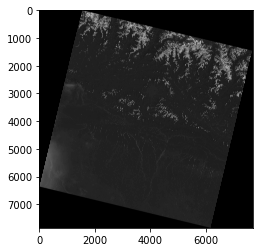

In [20]:
plt.imshow(image_b3 , 'gray')
print(image_b3.max(),image_b3.min())

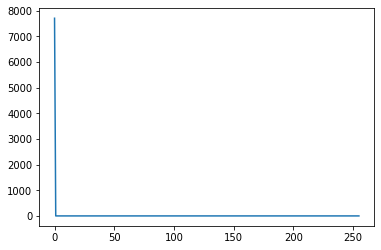

In [25]:
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
accumulate = False
b_hist = cv.calcHist(image_b3, [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

In [4]:
# plt.imshow(image_b4 , 'gray')
print(image_b4.max(),image_b4.min())

65535 0


In [5]:
# plt.imshow(image_b5 , 'gray')
print(image_b5.max(),image_b5.min())

65535 0


In [6]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min) / (array_max - array_min))

In [11]:
red = normalize(image_b3)
green = normalize(image_b4)
blue = normalize(image_b5)

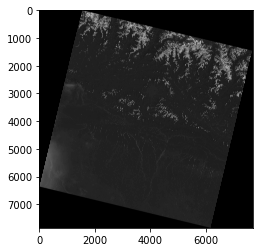

In [13]:
import numpy as np
# Create RGB natural color composite
rgb = np.dstack((red, green, blue))
print(rgb.shape)

(7851, 7711, 3)


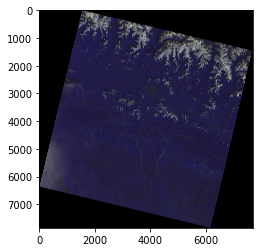

In [15]:
plt.imshow(rgb)

In [9]:
rgb = 255 * rgb 

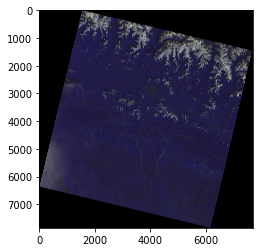

In [16]:
plt.imshow(rgb)